In [90]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.table import QTable, Table, Column
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as MAE
from statsmodels.tsa.ar_model import AutoReg

In [91]:
# Load the data
GSK_2020 = pd.read_csv('data/GSK_2020.csv',index_col=0, parse_dates=True)
JNJ_2020 = pd.read_csv('data/JNJ_2020.csv',index_col=0, parse_dates=True)
MRK_2020 = pd.read_csv('data/MRK_2020.csv',index_col=0, parse_dates=True)
PFE_2020 = pd.read_csv('data/PFE_2020.csv',index_col=0, parse_dates=True)
SNY_2020 = pd.read_csv('data/SNY_2020.csv',index_col=0, parse_dates=True)

In [92]:
GSK_2020['log_Adj_Close'] = np.log(GSK_2020['Adj Close'])
JNJ_2020['log_Adj_Close'] = np.log(JNJ_2020['Adj Close'])
MRK_2020['log_Adj_Close'] = np.log(MRK_2020['Adj Close'])
PFE_2020['log_Adj_Close'] = np.log(PFE_2020['Adj Close'])
SNY_2020['log_Adj_Close'] = np.log(SNY_2020['Adj Close'])

In [93]:
# Actual Value
GSK_actual_2020 = GSK_2020['log_Adj_Close'][2:]
JNJ_actual_2020 = JNJ_2020['log_Adj_Close'][2:]
MRK_actual_2020 = MRK_2020['log_Adj_Close'][2:]
PFE_actual_2020 = PFE_2020['log_Adj_Close'][2:]
SNY_actual_2020 = SNY_2020['log_Adj_Close'][2:]

In [94]:
def base_prediction(stock):
    pred_base = []
    base_xtrain = []
    base_ytrain = []
    for i in range(len(stock)-2):
        base_xtrain.append(stock.iloc[i]['log_Adj_Close'])
        base_ytrain.append(stock.iloc[i+1]['log_Adj_Close'])
        # Reshape the list to array for model fitting
        temp_x = np.array(base_xtrain).reshape(-1,1)
        temp_y = np.array(base_ytrain).reshape(-1,1)
        # Train the model with the training data set
        model = LinearRegression().fit(temp_x, temp_y)
        # Implement the model function to predict the value
        yhat = np.dot(model.coef_, [stock.iloc[i+1]['log_Adj_Close']]) + model.intercept_
        # Store the prediction 
        pred_base.append(yhat[0])
        
    return pred_base

In [95]:
# Base Prediction
GSK_base_2020 = base_prediction(GSK_2020)
JNJ_base_2020 = base_prediction(JNJ_2020)
MRK_base_2020 = base_prediction(MRK_2020)
PFE_base_2020 = base_prediction(PFE_2020)
SNY_base_2020 = base_prediction(SNY_2020)

In [96]:
# Report MAE for Base Model
MAE_GSK_base_2020 = MAE(GSK_base_2020,GSK_actual_2020)
MAE_PFE_base_2020 = MAE(PFE_base_2020,PFE_actual_2020)
MAE_JNJ_base_2020 = MAE(JNJ_base_2020,GSK_actual_2020)
MAE_SNY_base_2020 = MAE(SNY_base_2020,GSK_actual_2020)
MAE_MRK_base_2020 = MAE(MRK_base_2020,GSK_actual_2020)

In [97]:
def gt_prediction(stock, var):
    pred_trends = []
    trends_xtrain = []
    trends_ytrain = []
    for i in range(len(stock)-2):
        trends_xtrain.append([stock.iloc[i]['log_Adj_Close'],stock.iloc[i+1][var]])
        trends_ytrain.append(stock.iloc[i+1]['log_Adj_Close'])
        # Reshape the list to array for model fitting
        temp_x = np.array(trends_xtrain).reshape(-1,len(var)+1)
        temp_y = np.array(trends_ytrain).reshape(-1,1)
        # Train the model with the training data set
        model = LinearRegression().fit(temp_x, temp_y)
        # Implement the model function to predict the value
        yhat = np.dot(model.coef_, [stock.iloc[i+1]['log_Adj_Close'],stock.iloc[i+2][var]]) + model.intercept_
        # Store the prediction 
        pred_trends.append(yhat[0])
    print(model.coef_)
    return pred_trends

In [98]:
# Virus Prediction
var = ['Virus']
GSK_virus_2020 = gt_prediction(GSK_2020, var)
PFE_virus_2020 = gt_prediction(PFE_2020, var)
MRK_virus_2020 = gt_prediction(MRK_2020, var)
JNJ_virus_2020 = gt_prediction(JNJ_2020, var)
SNY_virus_2020 = gt_prediction(SNY_2020, var)

[[ 8.08297079e-01 -6.08942403e-04]]
[[ 0.56218545 -0.00129974]]
[[ 0.64035644 -0.00073581]]
[[ 0.36656439 -0.00129449]]
[[ 0.24384667 -0.00236797]]


In [99]:
MAE_GSK_virus_2020 = MAE(GSK_virus_2020,GSK_actual_2020)
MAE_PFE_virus_2020 = MAE(PFE_virus_2020,PFE_actual_2020)
MAE_SNY_virus_2020 = MAE(SNY_virus_2020,SNY_actual_2020)
MAE_JNJ_virus_2020 = MAE(JNJ_virus_2020,JNJ_actual_2020)
MAE_MRK_virus_2020 = MAE(MRK_virus_2020,MRK_actual_2020)

In [100]:
# Vaccine Prediction
var = ['Vaccine']
GSK_vaccine_2020 = gt_prediction(GSK_2020, var)
GSK_vaccine_2020 = gt_prediction(GSK_2020, var)
PFE_vaccine_2020 = gt_prediction(PFE_2020, var)
MRK_vaccine_2020 = gt_prediction(MRK_2020, var)
JNJ_vaccine_2020 = gt_prediction(JNJ_2020, var)
SNY_vaccine_2020 = gt_prediction(SNY_2020, var)

[[ 7.69285279e-01 -5.23359483e-04]]
[[ 7.69285279e-01 -5.23359483e-04]]
[[8.44437221e-01 3.09169543e-04]]
[[ 7.07979410e-01 -3.24575858e-04]]
[[ 7.00557052e-01 -2.86612532e-05]]
[[ 7.62123957e-01 -5.11620564e-05]]


In [101]:
MAE_GSK_vaccine_2020 = MAE(GSK_vaccine_2020,GSK_actual_2020)
MAE_PFE_vaccine_2020 = MAE(PFE_vaccine_2020,PFE_actual_2020)
MAE_SNY_vaccine_2020 = MAE(SNY_vaccine_2020,SNY_actual_2020)
MAE_JNJ_vaccine_2020 = MAE(JNJ_vaccine_2020,JNJ_actual_2020)
MAE_MRK_vaccine_2020 = MAE(MRK_vaccine_2020,MRK_actual_2020)

In [102]:
# Flu Prediction
var = ['Flu']
GSK_flu_2020 = gt_prediction(GSK_2020, var)
PFE_flu_2020 = gt_prediction(PFE_2020, var)
MRK_flu_2020 = gt_prediction(MRK_2020, var)
JNJ_flu_2020 = gt_prediction(JNJ_2020, var)
SNY_flu_2020 = gt_prediction(SNY_2020, var)

[[ 8.16959379e-01 -7.97708982e-04]]
[[ 0.65430704 -0.00110149]]
[[ 7.07113815e-01 -6.40403901e-04]]
[[ 0.4362448  -0.00124779]]
[[ 0.36117585 -0.00227025]]


In [103]:
MAE_GSK_flu_2020 = MAE(GSK_flu_2020,GSK_actual_2020)
MAE_PFE_flu_2020 = MAE(PFE_flu_2020,PFE_actual_2020)
MAE_SNY_flu_2020 = MAE(SNY_flu_2020,SNY_actual_2020)
MAE_JNJ_flu_2020 = MAE(JNJ_flu_2020,JNJ_actual_2020)
MAE_MRK_flu_2020 = MAE(MRK_flu_2020,MRK_actual_2020)

In [126]:
def trends_prediction(stock):
    pred_trends = []
    trends_xtrain = []
    trends_ytrain = []
    for i in range(len(stock)-2):
        trends_xtrain.append([stock.iloc[i]['log_Adj_Close'],stock.iloc[i+1]['Virus'],stock.iloc[i+1]['Vaccine']])
        trends_ytrain.append(stock.iloc[i+1]['log_Adj_Close'])
        # Reshape the list to array for model fitting
        temp_x = np.array(trends_xtrain).reshape(-1,3)
        temp_y = np.array(trends_ytrain).reshape(-1,1)
        # Train the model with the training data set
        model = LinearRegression().fit(temp_x, temp_y)
        # Implement the model function to predict the value
        yhat = np.dot(model.coef_, [stock.iloc[i+1]['log_Adj_Close'],stock.iloc[i+2]['Virus'],stock.iloc[i+2]['Vaccine']]) + model.intercept_
        # Store the prediction 
        pred_trends.append(yhat[0])
    print(model.coef_)
    return pred_trends

In [130]:
def trends_prediction_1(stock):
    pred_trends = []
    trends_xtrain = []
    trends_ytrain = []
    for i in range(len(stock)-2):
        trends_xtrain.append([stock.iloc[i]['log_Adj_Close'],stock.iloc[i+1]['Virus'],stock.iloc[i+1]['Vaccine'],stock.iloc[i+1]['Flu']])
        trends_ytrain.append(stock.iloc[i+1]['log_Adj_Close'])
        # Reshape the list to array for model fitting
        temp_x = np.array(trends_xtrain).reshape(-1,4)
        temp_y = np.array(trends_ytrain).reshape(-1,1)
        # Train the model with the training data set
        model = LinearRegression().fit(temp_x, temp_y)
        # Implement the model function to predict the value
        yhat = np.dot(model.coef_, [stock.iloc[i+1]['log_Adj_Close'],stock.iloc[i+2]['Virus'],stock.iloc[i+2]['Vaccine'],stock.iloc[i+2]['Flu']]) + model.intercept_
        # Store the prediction 
        pred_trends.append(yhat[0])
    print(model.coef_)
    return pred_trends

In [131]:
# Trends Prediction
GSK_trends_2020 = trends_prediction(GSK_2020)
JNJ_trends_2020 = trends_prediction(JNJ_2020)
MRK_trends_2020 = trends_prediction(MRK_2020)
PFE_trends_2020 = trends_prediction(PFE_2020)
SNY_trends_2020 = trends_prediction(SNY_2020)

[[ 7.23920319e-01 -6.06092948e-04 -5.18031291e-04]]
[[ 3.56912458e-01 -1.34425235e-03  1.92022038e-04]]
[[ 5.62236802e-01 -7.67828014e-04 -3.94000164e-04]]
[[ 5.82250536e-01 -1.32160487e-03  3.59468263e-04]]
[[ 0.19383956 -0.00258274  0.00048494]]


In [132]:
# Trends Prediction
GSK_trends_2020 = trends_prediction_1(GSK_2020)
JNJ_trends_2020 = trends_prediction_1(JNJ_2020)
MRK_trends_2020 = trends_prediction_1(MRK_2020)
PFE_trends_2020 = trends_prediction_1(PFE_2020)
SNY_trends_2020 = trends_prediction_1(SNY_2020)

[[ 0.71538931  0.00138703 -0.00084272 -0.00227031]]
[[ 3.56059994e-01 -1.37995117e-03  1.97432130e-04  3.90234060e-05]]
[[ 5.37433788e-01 -1.17618231e-03 -3.67399921e-04  4.32970895e-04]]
[[ 5.56220197e-01 -2.26344134e-03  4.85236416e-04  1.00771178e-03]]
[[ 0.21511086 -0.00206303  0.00040187 -0.00052658]]


In [43]:
MAE_GSK_trends_2020 = MAE(GSK_trends_2020,GSK_actual_2020)
MAE_PFE_trends_2020 = MAE(PFE_trends_2020,PFE_actual_2020)
MAE_SNY_trends_2020 = MAE(SNY_trends_2020,SNY_actual_2020)
MAE_JNJ_trends_2020 = MAE(JNJ_trends_2020,JNJ_actual_2020)
MAE_MRK_trends_2020 = MAE(MRK_trends_2020,MRK_actual_2020)

In [44]:
# Report absolute error for base
AE_GSK_b = abs(GSK_base_2020 - GSK_actual_2020)
AE_JNJ_b = abs(JNJ_base_2020 - JNJ_actual_2020)
AE_MRK_b = abs(MRK_base_2020 - MRK_actual_2020)
AE_PFE_b = abs(PFE_base_2020 - PFE_actual_2020)
AE_SNY_b = abs(SNY_base_2020 - SNY_actual_2020)

In [53]:
# Report absolute error for 'virus'
AE_GSK_t = abs(GSK_virus_2020 - GSK_actual_2020)
AE_JNJ_t = abs(JNJ_virus_2020 - JNJ_actual_2020)
AE_MRK_t = abs(MRK_virus_2020 - MRK_actual_2020)
AE_PFE_t = abs(PFE_virus_2020 - PFE_actual_2020)
AE_SNY_t = abs(SNY_virus_2020 - SNY_actual_2020)

In [60]:
# Report absolute error for 'vaccine'
AE_GSK_t = abs(GSK_vaccine_2020 - GSK_actual_2020)
AE_JNJ_t = abs(JNJ_vaccine_2020 - JNJ_actual_2020)
AE_MRK_t = abs(MRK_vaccine_2020 - MRK_actual_2020)
AE_PFE_t = abs(PFE_vaccine_2020 - PFE_actual_2020)
AE_SNY_t = abs(SNY_vaccine_2020 - SNY_actual_2020)

In [110]:
# Report absolute error for 'flu'
AE_GSK_t = abs(GSK_flu_2020 - GSK_actual_2020)
AE_JNJ_t = abs(JNJ_flu_2020 - JNJ_actual_2020)
AE_MRK_t = abs(MRK_flu_2020 - MRK_actual_2020)
AE_PFE_t = abs(PFE_flu_2020 - PFE_actual_2020)
AE_SNY_t = abs(SNY_flu_2020 - SNY_actual_2020)

In [133]:
# Report absolute error for trends
AE_GSK_t = abs(GSK_trends_2020 - GSK_actual_2020)
AE_JNJ_t = abs(JNJ_trends_2020 - JNJ_actual_2020)
AE_MRK_t = abs(MRK_trends_2020 - MRK_actual_2020)
AE_PFE_t = abs(PFE_trends_2020 - PFE_actual_2020)
AE_SNY_t = abs(SNY_trends_2020 - SNY_actual_2020)

In [134]:
diff_AE_GSK = AE_GSK_b - AE_GSK_t
diff_AE_JNJ = AE_JNJ_b - AE_JNJ_t
diff_AE_MRK = AE_MRK_b - AE_MRK_t
diff_AE_PFE = AE_PFE_b - AE_PFE_t
diff_AE_SNY = AE_SNY_b - AE_SNY_t

In [140]:
def plot(stock, actual, base, trends):
    plt.plot(stock.index[2:], actual, color='black', label='Actual')
    plt.plot(stock.index[2:], base, color='black', label='Base', linestyle=":")
    plt.plot(stock.index[2:], trends, color='gray', label='trends')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Stock Price')

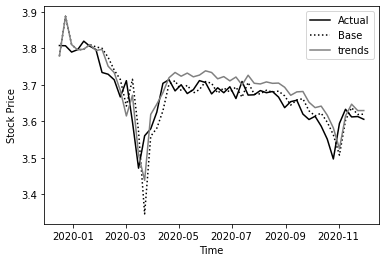

In [68]:
# GSK Virus
plot(GSK_2020, GSK_actual_2020, GSK_base_2020, GSK_virus_2020)

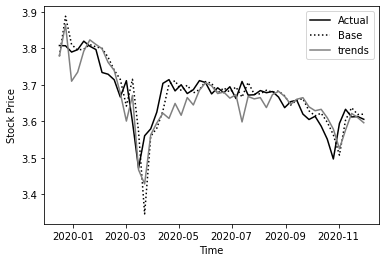

In [69]:
# GSK Vaccine
plot(GSK_2020, GSK_actual_2020, GSK_base_2020, GSK_vaccine_2020)

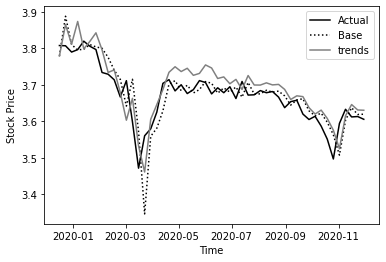

In [117]:
# GSK Flu
plot(GSK_2020, GSK_actual_2020, GSK_base_2020, GSK_flu_2020)

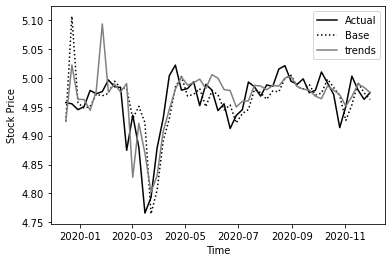

In [122]:
plot(JNJ_2020, JNJ_actual_2020, JNJ_base_2020, JNJ_flu_2020)

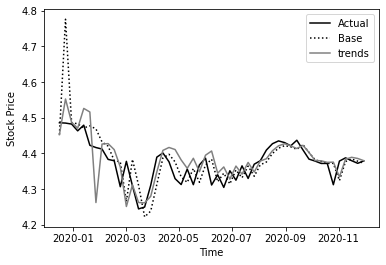

In [123]:
plot(MRK_2020, MRK_actual_2020, MRK_base_2020, MRK_flu_2020)

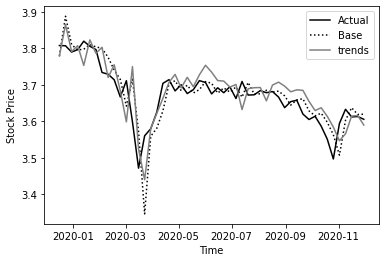

In [141]:
# GSK Trends
plot(GSK_2020, GSK_actual_2020, GSK_base_2020, GSK_trends_2020)

In [72]:
# Recession periods
p1_GSK = GSK_actual_2020[(GSK_actual_2020.index>="2020/03/01")&(GSK_actual_2020.index<"2020/05/01")]
p1_JNJ = JNJ_actual_2020[(JNJ_actual_2020.index>="2020/03/01")&(JNJ_actual_2020.index<"2020/05/01")]
p1_MRK = MRK_actual_2020[(MRK_actual_2020.index>="2020/03/01")&(MRK_actual_2020.index<"2020/05/01")]
p1_PFE = PFE_actual_2020[(PFE_actual_2020.index>="2020/03/01")&(PFE_actual_2020.index<"2020/05/01")]
p1_SNY = SNY_actual_2020[(SNY_actual_2020.index>="2020/03/01")&(SNY_actual_2020.index<"2020/05/01")]

p2_GSK = GSK_actual_2020[(GSK_actual_2020.index>="2020/09/15")&(GSK_actual_2020.index<"2020/11/01")]
p2_JNJ = JNJ_actual_2020[(JNJ_actual_2020.index>="2020/09/15")&(JNJ_actual_2020.index<"2020/11/01")]
p2_MRK = MRK_actual_2020[(MRK_actual_2020.index>="2020/09/15")&(MRK_actual_2020.index<"2020/11/01")]
p2_PFE = PFE_actual_2020[(PFE_actual_2020.index>="2020/09/15")&(PFE_actual_2020.index<"2020/11/01")]
p2_SNY = SNY_actual_2020[(SNY_actual_2020.index>="2020/09/15")&(SNY_actual_2020.index<"2020/11/01")]

In [76]:
start1 = GSK_actual_2020.index.get_loc(p1_GSK.index[0])-2
end1 = GSK_actual_2020.index.get_loc(p1_GSK.index[-1])-1

start2 = GSK_actual_2020.index.get_loc(p2_GSK.index[0])-2
end2 = GSK_actual_2020.index.get_loc(p2_GSK.index[-1])-1

In [77]:
p1_GSK_base = GSK_base_2020[start1 : end1]
p1_JNJ_base = JNJ_base_2020[start1 : end1]
p1_MRK_base = MRK_base_2020[start1 : end1]
p1_PFE_base = PFE_base_2020[start1 : end1]
p1_SNY_base = SNY_base_2020[start1 : end1]

p2_GSK_base = GSK_base_2020[start2 : end2]
p2_JNJ_base = JNJ_base_2020[start2 : end2]
p2_MRK_base = MRK_base_2020[start2 : end2]
p2_PFE_base = PFE_base_2020[start2 : end2]
p2_SNY_base = SNY_base_2020[start2 : end2]

In [78]:
p1_GSK_trends = GSK_virus_2020[start1 : end1]
p1_JNJ_trends = JNJ_virus_2020[start1 : end1]
p1_MRK_trends = MRK_virus_2020[start1 : end1]
p1_PFE_trends = PFE_virus_2020[start1 : end1]
p1_SNY_trends = SNY_virus_2020[start1 : end1]

p2_GSK_trends = GSK_virus_2020[start2 : end2]
p2_JNJ_trends = JNJ_virus_2020[start2 : end2]
p2_MRK_trends = MRK_virus_2020[start2 : end2]
p2_PFE_trends = PFE_virus_2020[start2 : end2]
p2_SNY_trends = SNY_virus_2020[start2 : end2]

In [82]:
p1_GSK_trends = GSK_vaccine_2020[start1 : end1]
p1_JNJ_trends = JNJ_vaccine_2020[start1 : end1]
p1_MRK_trends = MRK_vaccine_2020[start1 : end1]
p1_PFE_trends = PFE_vaccine_2020[start1 : end1]
p1_SNY_trends = SNY_vaccine_2020[start1 : end1]

p2_GSK_trends = GSK_vaccine_2020[start2 : end2]
p2_JNJ_trends = JNJ_vaccine_2020[start2 : end2]
p2_MRK_trends = MRK_vaccine_2020[start2 : end2]
p2_PFE_trends = PFE_vaccine_2020[start2 : end2]
p2_SNY_trends = SNY_vaccine_2020[start2 : end2]

In [118]:
p1_GSK_trends = GSK_flu_2020[start1 : end1]
p1_JNJ_trends = JNJ_flu_2020[start1 : end1]
p1_MRK_trends = MRK_flu_2020[start1 : end1]
p1_PFE_trends = PFE_flu_2020[start1 : end1]
p1_SNY_trends = SNY_flu_2020[start1 : end1]

p2_GSK_trends = GSK_flu_2020[start2 : end2]
p2_JNJ_trends = JNJ_flu_2020[start2 : end2]
p2_MRK_trends = MRK_flu_2020[start2 : end2]
p2_PFE_trends = PFE_flu_2020[start2 : end2]
p2_SNY_trends = SNY_flu_2020[start2 : end2]

In [142]:
p1_GSK_trends = GSK_trends_2020[start1 : end1]
p1_JNJ_trends = JNJ_trends_2020[start1 : end1]
p1_MRK_trends = MRK_trends_2020[start1 : end1]
p1_PFE_trends = PFE_trends_2020[start1 : end1]
p1_SNY_trends = SNY_trends_2020[start1 : end1]

p2_GSK_trends = GSK_trends_2020[start2 : end2]
p2_JNJ_trends = JNJ_trends_2020[start2 : end2]
p2_MRK_trends = MRK_trends_2020[start2 : end2]
p2_PFE_trends = PFE_trends_2020[start2 : end2]
p2_SNY_trends = SNY_trends_2020[start2 : end2]

In [143]:
# Report the MAE for each period
MAE_GSK_b1 = MAE(p1_GSK, p1_GSK_base) 
MAE_GSK_t1 = MAE(p1_GSK, p1_GSK_trends)
MAE_JNJ_b1 = MAE(p1_JNJ, p1_JNJ_base) 
MAE_JNJ_t1 = MAE(p1_JNJ, p1_JNJ_trends)
MAE_MRK_b1 = MAE(p1_MRK, p1_MRK_base) 
MAE_MRK_t1 = MAE(p1_MRK, p1_MRK_trends)
MAE_PFE_b1 = MAE(p1_PFE, p1_PFE_base) 
MAE_PFE_t1 = MAE(p1_PFE, p1_PFE_trends)
MAE_SNY_b1 = MAE(p1_SNY, p1_SNY_base) 
MAE_SNY_t1 = MAE(p1_SNY, p1_SNY_trends)

MAE_GSK_b2 = MAE(p2_GSK, p2_GSK_base) 
MAE_GSK_t2 = MAE(p2_GSK, p2_GSK_trends)
MAE_JNJ_b2 = MAE(p2_JNJ, p2_JNJ_base) 
MAE_JNJ_t2 = MAE(p2_JNJ, p2_JNJ_trends)
MAE_MRK_b2 = MAE(p2_MRK, p2_MRK_base) 
MAE_MRK_t2 = MAE(p2_MRK, p2_MRK_trends)
MAE_PFE_b2 = MAE(p2_PFE, p2_PFE_base) 
MAE_PFE_t2 = MAE(p2_PFE, p2_PFE_trends)
MAE_SNY_b2 = MAE(p2_SNY, p2_SNY_base) 
MAE_SNY_t2 = MAE(p2_SNY, p2_SNY_trends)

In [144]:
# Make the table
data_rows = (["Base MAE", round(MAE_GSK_b1, 5), round(MAE_JNJ_b1, 5), round(MAE_MRK_b1, 5),round(MAE_PFE_b1, 5),round(MAE_SNY_b1, 5)],
             ["Trends MAE", round(MAE_GSK_t1, 5), round(MAE_JNJ_t1, 5),round(MAE_MRK_t1, 5),round(MAE_PFE_t1, 5),round(MAE_SNY_t1, 5)])
t1 = Table(rows=data_rows, names=('MAE Type', 'GSK', 'JNJ', 'MRK', 'PFE', 'SNY'))
print(' Behavio of MAE around Turning Points - Period 1')
print(t1)

 Behavio of MAE around Turning Points - Period 1
 MAE Type    GSK     JNJ     MRK     PFE     SNY  
---------- ------- ------- ------- ------- -------
  Base MAE 0.12119 0.11749 0.07502 0.11998 0.11982
Trends MAE 0.10255 0.11597 0.07451 0.10765 0.10512


In [145]:
# Make the table
data_rows = (["Base MAE", round(MAE_GSK_b2, 5), round(MAE_JNJ_b2, 5), round(MAE_MRK_b2, 5),round(MAE_PFE_b2, 5),round(MAE_SNY_b2, 5)],
             ["Trends MAE", round(MAE_GSK_t2, 5), round(MAE_JNJ_t2, 5),round(MAE_MRK_t2, 5),round(MAE_PFE_t2, 5),round(MAE_SNY_t2, 5)])
t1 = Table(rows=data_rows, names=('MAE Type', 'GSK', 'JNJ', 'MRK', 'PFE', 'SNY'))
print(' Behavio of MAE around Turning Points - Period 2')
print(t1)

 Behavio of MAE around Turning Points - Period 2
 MAE Type    GSK     JNJ     MRK     PFE     SNY  
---------- ------- ------- ------- ------- -------
  Base MAE 0.05967  0.0235 0.03138 0.02679 0.03081
Trends MAE 0.08339 0.02545 0.04344 0.02745 0.02717


<BarContainer object of 51 artists>

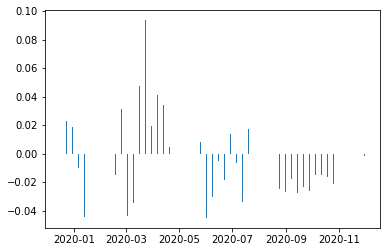

In [135]:
plt.bar(pd.to_datetime(diff_AE_GSK.index), diff_AE_GSK)

<BarContainer object of 51 artists>

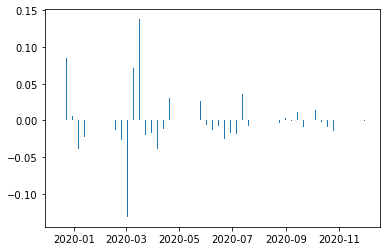

In [136]:
plt.bar(pd.to_datetime(diff_AE_JNJ.index), diff_AE_JNJ)

<BarContainer object of 51 artists>

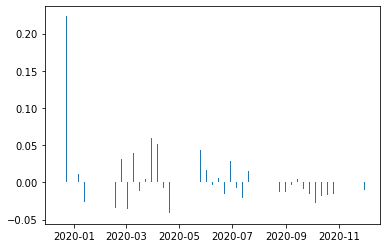

In [137]:
plt.bar(pd.to_datetime(diff_AE_MRK.index), diff_AE_MRK)

<BarContainer object of 51 artists>

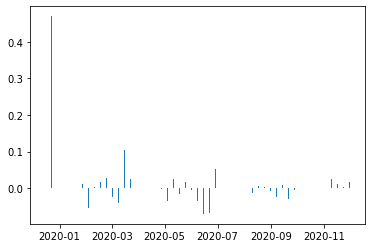

In [138]:
plt.bar(pd.to_datetime(diff_AE_PFE.index), diff_AE_PFE)

<BarContainer object of 51 artists>

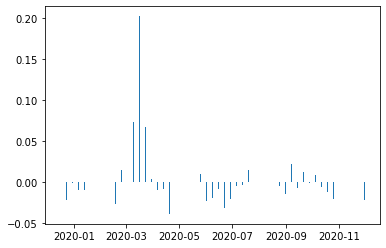

In [139]:
plt.bar(pd.to_datetime(diff_AE_SNY.index), diff_AE_SNY)